# **LSTM Exercise**

## Import libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [29]:
dataframe = pd.read_csv('traffic.csv', usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.head()

,Vehicles
0,15
1,13
2,10
3,7
4,9


## Normalize the dataset

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## split into train and test sets

In [31]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

32240 15880


## Fit the LSTM

In [32]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]  # Indent this line
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [33]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [34]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [35]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)


Epoch 1/100


c:\Users\wwwwe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3224/3224 - 7s - 2ms/step - loss: 0.0028
Epoch 2/100
3224/3224 - 5s - 1ms/step - loss: 7.4035e-04
Epoch 3/100
3224/3224 - 5s - 1ms/step - loss: 7.3592e-04
Epoch 4/100
3224/3224 - 5s - 1ms/step - loss: 7.3171e-04
Epoch 5/100
3224/3224 - 5s - 1ms/step - loss: 7.3343e-04
Epoch 6/100
3224/3224 - 5s - 1ms/step - loss: 7.3215e-04
Epoch 7/100
3224/3224 - 4s - 1ms/step - loss: 7.3390e-04
Epoch 8/100
3224/3224 - 4s - 1ms/step - loss: 7.3373e-04
Epoch 9/100
3224/3224 - 5s - 1ms/step - loss: 7.3329e-04
Epoch 10/100
3224/3224 - 5s - 1ms/step - loss: 7.3138e-04
Epoch 11/100
3224/3224 - 5s - 1ms/step - loss: 7.3304e-04
Epoch 12/100
3224/3224 - 5s - 1ms/step - loss: 7.3244e-04
Epoch 13/100
3224/3224 - 5s - 1ms/step - loss: 7.3149e-04
Epoch 14/100
3224/3224 - 5s - 1ms/step - loss: 7.3353e-04
Epoch 15/100
3224/3224 - 5s - 1ms/step - loss: 7.3171e-04
Epoch 16/100
3224/3224 - 5s - 1ms/step - loss: 7.3078e-04
Epoch 17/100
3224/3224 - 5s - 2ms/step - loss: 7.3339e-04
Epoch 18/100
3224/3224 - 5s - 1ms/step 

## Make preductuion and evaluatuin matrix.

In [36]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train Score: 4.83 RMSE
Test Score: 5.49 RMSE


## Visualize the result

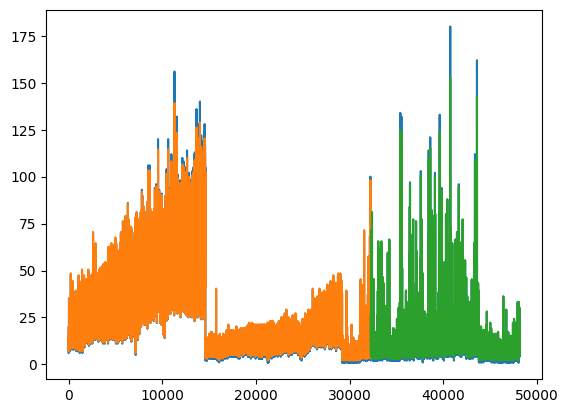

: 

In [37]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# **Well done** :)